In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

In [3]:
df = pd.read_csv('winequality-white.csv', delimiter = ';')

<AxesSubplot:>

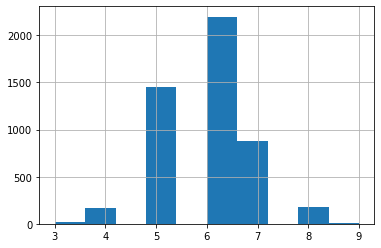

In [4]:
df['quality'].hist()

In [22]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<AxesSubplot:>

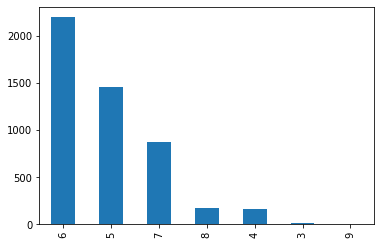

In [23]:
df['quality'].value_counts().plot(kind='bar')

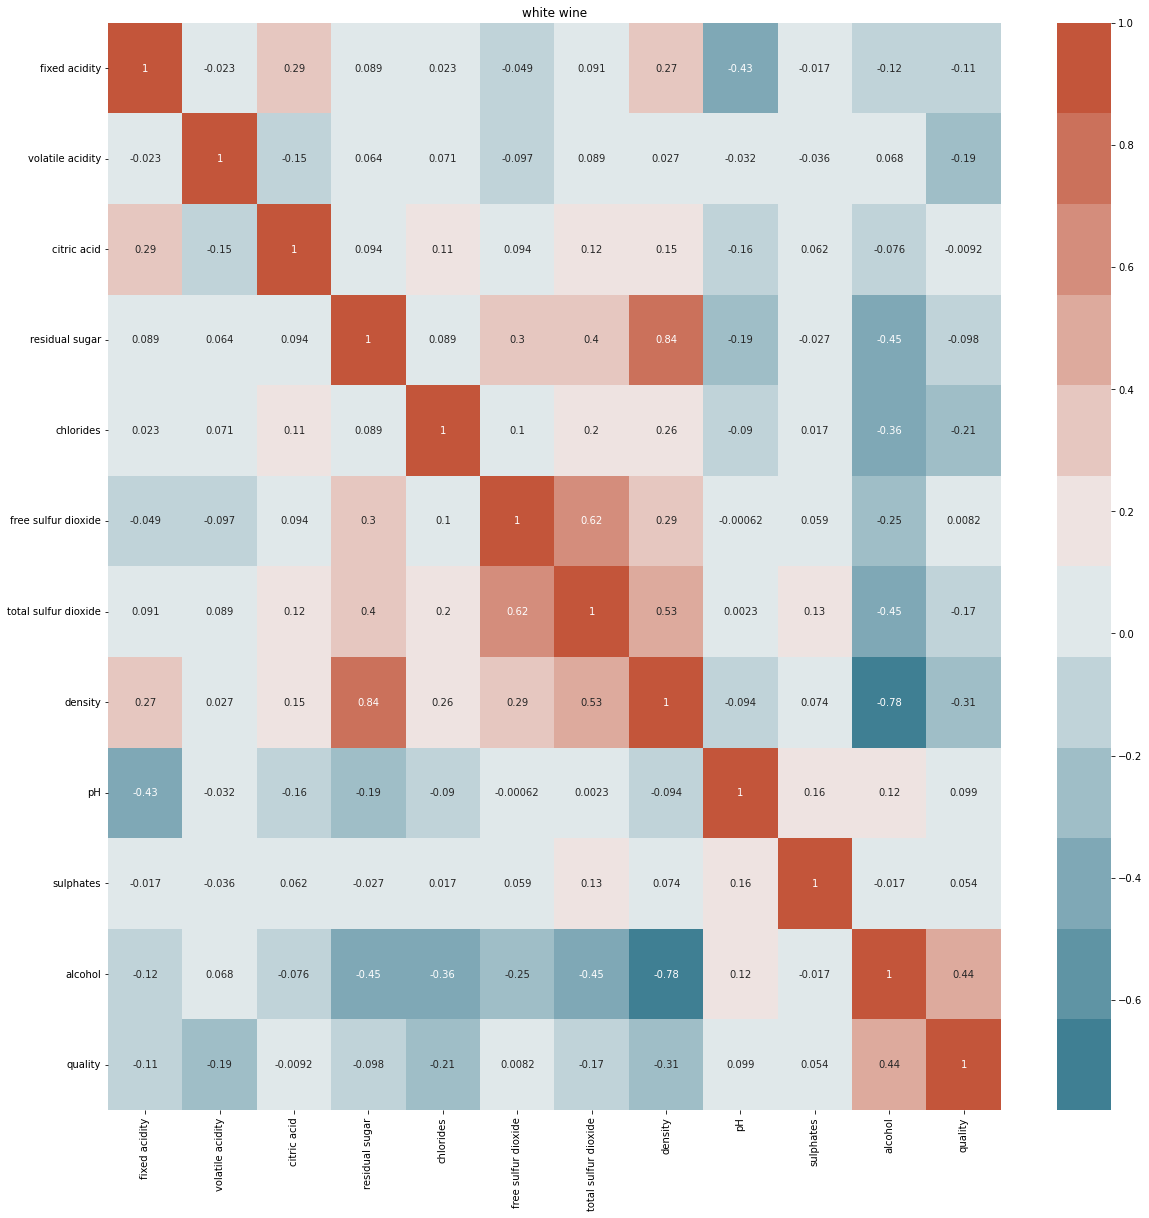

In [5]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220,20,n=12), annot = True)
plt.title('white wine')
plt.show()

In [11]:
#Indicate the target column
target = df['quality']

#Indicatethe columns that will serve as features.
features = df.drop('quality', axis = 1)

features.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [12]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features[0]

array([ 0.17209696, -0.0817699 ,  0.2132802 ,  2.82134917, -0.035355  ,
        0.56993158,  0.74456503,  2.33151201, -1.24692128, -0.34918426,
       -1.39315246])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [14]:
#import gridsearch from the sklearn library 
from sklearn.model_selection import GridSearchCV

def best_parameter(param_grid, estimator):
    #fit on the dataset on all parameter combinations in param_grid 
    #retain the best conbination 
    grid_search = GridSearchCV(estimator, param_grid, cv = 5)
    #Train model while tuning the parameters using grid search 
    grid_result = grid_search.fit(x_train, y_train)
    #display the best parameter c value 
    print(grid_result.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)

In [73]:
def validation(estimator):
    #train model 
    estimator.fit(x_train, y_train)

    #predict the target for the test dataset 
    test_predict = estimator.predict(x_test)

    print(estimator.__class__)
    
    #compute the model accuracy on the development set: How often is the classifier correct?
    print("Accuracy (test):{}".format(metrics.accuracy_score(y_test, test_predict)))

    #print confusion matrix
    print(confusion_matrix(y_test, test_predict))

    #print precision, recall and f1 
    print(classification_report(y_test, test_predict))

In [16]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#the param_grid specifies one grid should be explored 
param_grid = {"n_neighbors":[1,3, 5,7, 9, 11], "weights" : ['uniform', 'distance'], 
              "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p":[1,2,3]}

best_parameter(param_grid, KNeighborsClassifier())

{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
0.6470101258894363
KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')


In [17]:


def calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test):
    
    neighbors = np.arange(1, 10)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors= k)
        knn.fit(X_train , y_train)
        train_accuracy[i] = knn.score(X_train, y_train)    
        test_accuracy[i] = knn.score(X_test, y_test)

    plt.figure(figsize=(10, 8))   
    plt.title('k in kNN analysis')
    plt.plot( neighbors , test_accuracy , label = 'Testing Accuracy')
    plt.plot(neighbors,train_accuracy ,label = 'Training Accuracy')
    plt.legend()
    plt.annotate('Best accuracy for this model with this k is {0:.2f} %'.format(max(test_accuracy) * 100), xy=(np.argmax(test_accuracy) + 1 , max(test_accuracy)), xytext=(5 , 0.85),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()



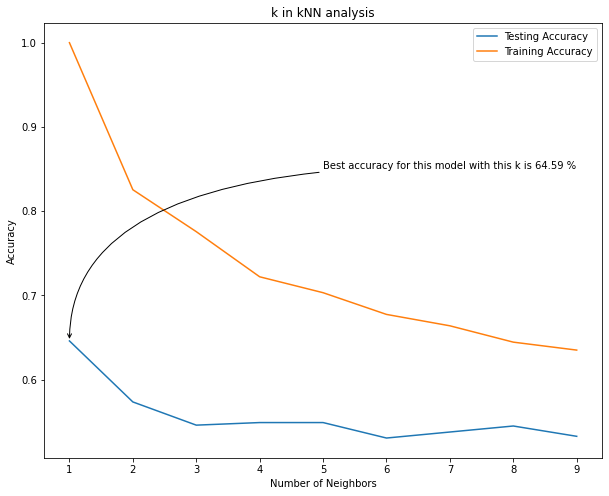

In [18]:
calculate_and_plot_k_neighbors(x_train, x_test, y_train, y_test)

In [20]:

def kNN_algorithm(X_train, X_test, y_train, y_test , k):
    
    global y_pred_kNN
    global kNN_pipeline
    
    steps = [('impute' , SimpleImputer(missing_values = 0, strategy='mean')),
             ('sclaer', StandardScaler()),
             ('kNN', KNeighborsClassifier(n_neighbors = k))]
    
    kNN_pipeline = Pipeline(steps)
    
    kNN_pipeline.fit(X_train , y_train)
    
    y_pred_kNN = kNN_pipeline.predict(X_test)
    
    print(classification_report(y_test , y_pred_kNN))
    print('kNN algorithm acuracy is : {0:.2f} %'.format(kNN_pipeline.score(X_test , y_test) * 100))



In [21]:


kNN_algorithm(x_train, x_test, y_train, y_test , 1)



              precision    recall  f1-score   support

           3       0.33      0.20      0.25         5
           4       0.28      0.36      0.32        25
           5       0.66      0.65      0.65       291
           6       0.68      0.67      0.67       432
           7       0.65      0.68      0.66       192
           8       0.56      0.54      0.55        35

    accuracy                           0.65       980
   macro avg       0.53      0.52      0.52       980
weighted avg       0.65      0.65      0.65       980

kNN algorithm acuracy is : 64.80 %


In [24]:
cf_matrix_knn = confusion_matrix(y_test, y_pred_kNN)

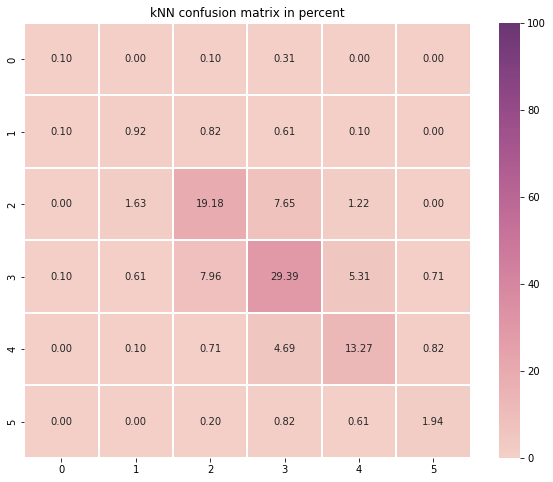

In [25]:

plt.figure(figsize=(10, 8))
sns.heatmap(
    cf_matrix_knn / np.sum(cf_matrix_knn) * 100,
    annot = True,
    cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
    fmt='.2f',
    linewidths=1.5,
    vmin=0,
    vmax=100,
)
plt.title("kNN confusion matrix in percent")
plt.show()

In [31]:
df = pd.read_csv('winequality-white.csv', delimiter = ';')
cut_bins = [1, 4, 6, 9]
df['quality'] = pd.cut(df['quality'], bins = cut_bins, labels = [0, 1, 2])
df['quality'].value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64

In [30]:

df = pd.read_csv('winequality-white.csv', delimiter = ';')
for i in range(len(df)):
    if df['quality'].iloc[i] == 3 or df['quality'].iloc[i] == 4  :
        df['quality'].iloc[i] = 0
    if  df['quality'].iloc[i] == 6 or df['quality'].iloc[i] == 5 :
        df['quality'].iloc[i] = 1
    if df['quality'].iloc[i] == 7 or df['quality'].iloc[i] == 8 or df['quality'].iloc[i] == 9 :
        df['quality'].iloc[i] = 2
df['quality'].value_counts()



/var/folders/rk/rb0btt_x2mxgsj16ky_t07tr0000gn/T/ipykernel_1530/2266366409.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'].iloc[i] = 1
/var/folders/rk/rb0btt_x2mxgsj16ky_t07tr0000gn/T/ipykernel_1530/2266366409.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'].iloc[i] = 2
/var/folders/rk/rb0btt_x2mxgsj16ky_t07tr0000gn/T/ipykernel_1530/2266366409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['qu

1    3655
2    1060
0     183
Name: quality, dtype: int64

In [32]:
#Indicate the target column
target = df['quality']

#Indicatethe columns that will serve as features.
features = df.drop('quality', axis = 1)

features.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [33]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features[0]

array([ 0.17209696, -0.0817699 ,  0.2132802 ,  2.82134917, -0.035355  ,
        0.56993158,  0.74456503,  2.33151201, -1.24692128, -0.34918426,
       -1.39315246])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [35]:
#the param_grid specifies one grid should be explored 
param_grid = {"n_neighbors":[1,3, 5,7, 9, 11], "weights" : ['uniform', 'distance'], 
              "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p":[1,2,3]}

best_parameter(param_grid, KNeighborsClassifier())

{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
0.8256747334949305
KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')


In [58]:
validation(KNeighborsClassifier(n_neighbors=11, p=1, weights='distance'))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy (test):0.8551020408163266
[[  5  24   1]
 [  1 679  43]
 [  0  73 154]]
              precision    recall  f1-score   support

           0       0.83      0.17      0.28        30
           1       0.88      0.94      0.91       723
           2       0.78      0.68      0.72       227

    accuracy                           0.86       980
   macro avg       0.83      0.59      0.64       980
weighted avg       0.85      0.86      0.84       980



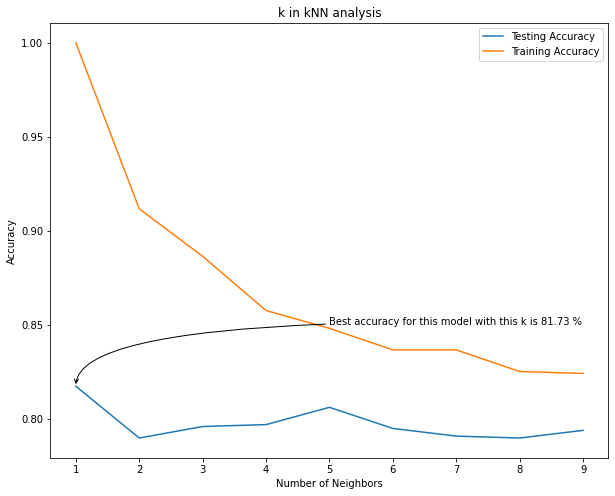

In [36]:
calculate_and_plot_k_neighbors(x_train, x_test, y_train, y_test)

In [39]:
#import decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 
#the param_grid specifies one grid should be explored 
param_grid = {"criterion":["gini", "entropy"], 
              "splitter" : ["best", "random"], 
              "max_depth":[5, 6, 7, 8, 9]}

best_parameter(param_grid, DecisionTreeClassifier())

{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}
0.7741157765788309
DecisionTreeClassifier(criterion='entropy', max_depth=7)


In [57]:
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=7)
validation(estimator)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy (test):0.7806122448979592
[[  5  24   1]
 [  6 652  65]
 [  0 119 108]]
              precision    recall  f1-score   support

           0       0.45      0.17      0.24        30
           1       0.82      0.90      0.86       723
           2       0.62      0.48      0.54       227

    accuracy                           0.78       980
   macro avg       0.63      0.51      0.55       980
weighted avg       0.76      0.78      0.77       980



In [62]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.9, random_state = 42)

In [64]:
x_train.shape

(489, 11)

In [69]:
from sklearn.svm import SVC

#the param_grid specifies one grid should be explored 
param_grid = {"C":[1, 10, 100, 1000]}

#fit on the dataset on all parameter combinations in param_grid 
#retain the best conbination 
best_parameter(param_grid, SVC(kernel = 'linear'))

{'C': 100}
0.7954555017883442
SVC(C=100, kernel='linear')


In [65]:
best_parameter({"C":[1, 10, 100, 1000], 'degree':[1,2,3,4,5]}, SVC(kernel = 'poly'))

{'C': 1000, 'degree': 1}
0.7954555017883442
SVC(C=1000, degree=1, kernel='poly')


In [66]:
best_parameter({"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto']}, 
               SVC(kernel = 'rbf'))

{'C': 1, 'gamma': 'auto'}
0.7996002524721229
SVC(C=1, gamma='auto')


In [68]:
best_parameter({"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto'], 
               "coef0":[0,1,10]},
               SVC(kernel = 'sigmoid'))

{'C': 1, 'coef0': 0, 'gamma': 'scale'}
0.7689459288870187
SVC(C=1, coef0=0, kernel='sigmoid')


In [71]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [74]:
validation(SVC(C=1, gamma='auto', kernel = 'rbf'))

<class 'sklearn.svm._classes.SVC'>
Accuracy (test):0.7938775510204081
[[  1  29   0]
 [  0 698  25]
 [  0 148  79]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        30
           1       0.80      0.97      0.87       723
           2       0.76      0.35      0.48       227

    accuracy                           0.79       980
   macro avg       0.85      0.45      0.47       980
weighted avg       0.80      0.79      0.76       980

